# Aprendizagem HW 3 - Análise de Preços de Aluguel

Este notebook realiza análise comparativa entre modelos de regressão para predição de preços de aluguel.

## 1. Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Configuração para melhor visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Para garantir reprodutibilidade
np.random.seed(42)

df = pd.read_csv('rent.csv')

## 3. Preparação dos Dados

In [2]:
# Identificar a variável alvo (target)
# Assumindo que 'price' ou 'rent' é a variável alvo
# Vamos verificar as colunas
print("Colunas disponíveis:")
print(df.columns.tolist())

# Definir X e y
# Ajuste o nome da coluna target conforme necessário
target_col = 'price' if 'price' in df.columns else df.columns[-1]  # Assume última coluna se 'price' não existir

X = df.drop(columns=[target_col])
y = df[target_col]

print(f"\n Variável alvo identificada: '{target_col}'")
print(f"Shape de X: {X.shape}")
print(f"Shape de y: {y.shape}")

print(f"\nDistribuição da variável alvo (price):")
print(y.describe())

Colunas disponíveis:
['bathrooms', 'bedrooms', 'price', 'longitude', 'latitude', 'interest_level']

 Variável alvo identificada: 'price'
Shape de X: (49352, 5)
Shape de y: (49352,)

Distribuição da variável alvo (price):
count    4.935200e+04
mean     3.830174e+03
std      2.206687e+04
min      4.300000e+01
25%      2.500000e+03
50%      3.150000e+03
75%      4.100000e+03
max      4.490000e+06
Name: price, dtype: float64


## Questão 5

In [3]:
# Configurar 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

print("=" * 70)
print("QUESTÃO 5: COMPARAÇÃO DE MODELOS DE REGRESSÃO")
print("=" * 70)

# Criar pipelines com StandardScaler (importante para redes neurais)
# Modelo 1: Linear Regression
model_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

# Modelo 2: MLP sem função de ativação (identity)
# identity = sem ativação (saída linear)
model_mlp_no_activation = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='identity',  # Sem ativação
        max_iter=1000,
        random_state=42,
        early_stopping=False
    ))
])

# Modelo 3: MLP com função de ativação ReLU
model_mlp_relu = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='relu',  # Ativação ReLU
        max_iter=1000,
        random_state=42,
        early_stopping=False
    ))
])

QUESTÃO 5: COMPARAÇÃO DE MODELOS DE REGRESSÃO


### Treinamento e Avaliação com 5-Fold Cross Validation

In [4]:
print("\n" + "=" * 70)
print("TREINAMENTO DOS MODELOS COM 5-FOLD CROSS VALIDATION")
print("=" * 70)

# Dicionário para armazenar os resultados
results = {
    'Linear Regression': [],
    'MLP (sem ativação)': [],
    'MLP (ReLU)': []
}

# Treinar e avaliar cada modelo
models = [
    ('Linear Regression', model_lr),
    ('MLP (sem ativação)', model_mlp_no_activation),
    ('MLP (ReLU)', model_mlp_relu)
]

for name, model in models:
    print(f"\n Treinando: {name}")
    
    # Calcular MAE (Mean Absolute Error) com validação cruzada
    # Nota: neg_mean_absolute_error retorna valores negativos, multiplicamos por -1
    mae_scores = -cross_val_score(
        model, X, y, 
        cv=cv, 
        scoring='neg_mean_absolute_error',
        n_jobs=-1  # Usa todos os processadores disponíveis
    )
    
    results[name] = mae_scores
    
    print(f"   MAE por fold: {mae_scores}")
    print(f"   MAE médio: {mae_scores.mean():.4f}")
    print(f"   Desvio padrão: {mae_scores.std():.4f}")

print("\n Treinamento concluído!")


TREINAMENTO DOS MODELOS COM 5-FOLD CROSS VALIDATION

 Treinando: Linear Regression


   MAE por fold: [1146.84447982  954.5028905   938.23739386 1032.33050564 1382.08990461]
   MAE médio: 1090.8010
   Desvio padrão: 163.2555

 Treinando: MLP (sem ativação)
   MAE por fold: [1146.06642145  957.03117096  938.44259179 1030.20552267 1381.17835249]
   MAE médio: 1090.5848
   Desvio padrão: 162.5745

 Treinando: MLP (ReLU)
   MAE por fold: [1146.06642145  957.03117096  938.44259179 1030.20552267 1381.17835249]
   MAE médio: 1090.5848
   Desvio padrão: 162.5745

 Treinando: MLP (ReLU)


/home/olb100689/Documentos/ist/aprendizagem/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olb100689/Documentos/ist/aprendizagem/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/olb100689/Documentos/ist/aprendizagem/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


   MAE por fold: [1052.65713199  906.31555959  896.54000274  947.74021924 1274.78876064]
   MAE médio: 1015.6083
   Desvio padrão: 140.9080

 Treinamento concluído!


/home/olb100689/Documentos/ist/aprendizagem/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### Análise Comparativa dos Resultados

In [5]:
print("\n" + "=" * 70)
print("ANÁLISE COMPARATIVA DOS MODELOS")
print("=" * 70)

# Criar DataFrame com os resultados
results_df = pd.DataFrame(results)

print("\n Resumo estatístico do MAE de teste:")
print("\n" + "-" * 70)
summary = pd.DataFrame({
    'Modelo': results.keys(),
    'MAE Médio': [np.mean(v) for v in results.values()],
    'Desvio Padrão': [np.std(v) for v in results.values()],
    'MAE Mínimo': [np.min(v) for v in results.values()],
    'MAE Máximo': [np.max(v) for v in results.values()]
})

print(summary.to_string(index=False))
print("-" * 70)

# Identificar melhor modelo
best_model = summary.loc[summary['MAE Médio'].idxmin(), 'Modelo']
best_mae = summary['MAE Médio'].min()

print(f"\n Melhor modelo: {best_model}")
print(f"   MAE médio: {best_mae:.4f}")


ANÁLISE COMPARATIVA DOS MODELOS

 Resumo estatístico do MAE de teste:

----------------------------------------------------------------------
            Modelo   MAE Médio  Desvio Padrão  MAE Mínimo  MAE Máximo
 Linear Regression 1090.801035     163.255459  938.237394 1382.089905
MLP (sem ativação) 1090.584812     162.574477  938.442592 1381.178352
        MLP (ReLU) 1015.608335     140.908031  896.540003 1274.788761
----------------------------------------------------------------------

 Melhor modelo: MLP (ReLU)
   MAE médio: 1015.6083


### Visualização: Boxplot do MAE de Teste

/tmp/ipykernel_794688/2401416495.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data_to_plot,


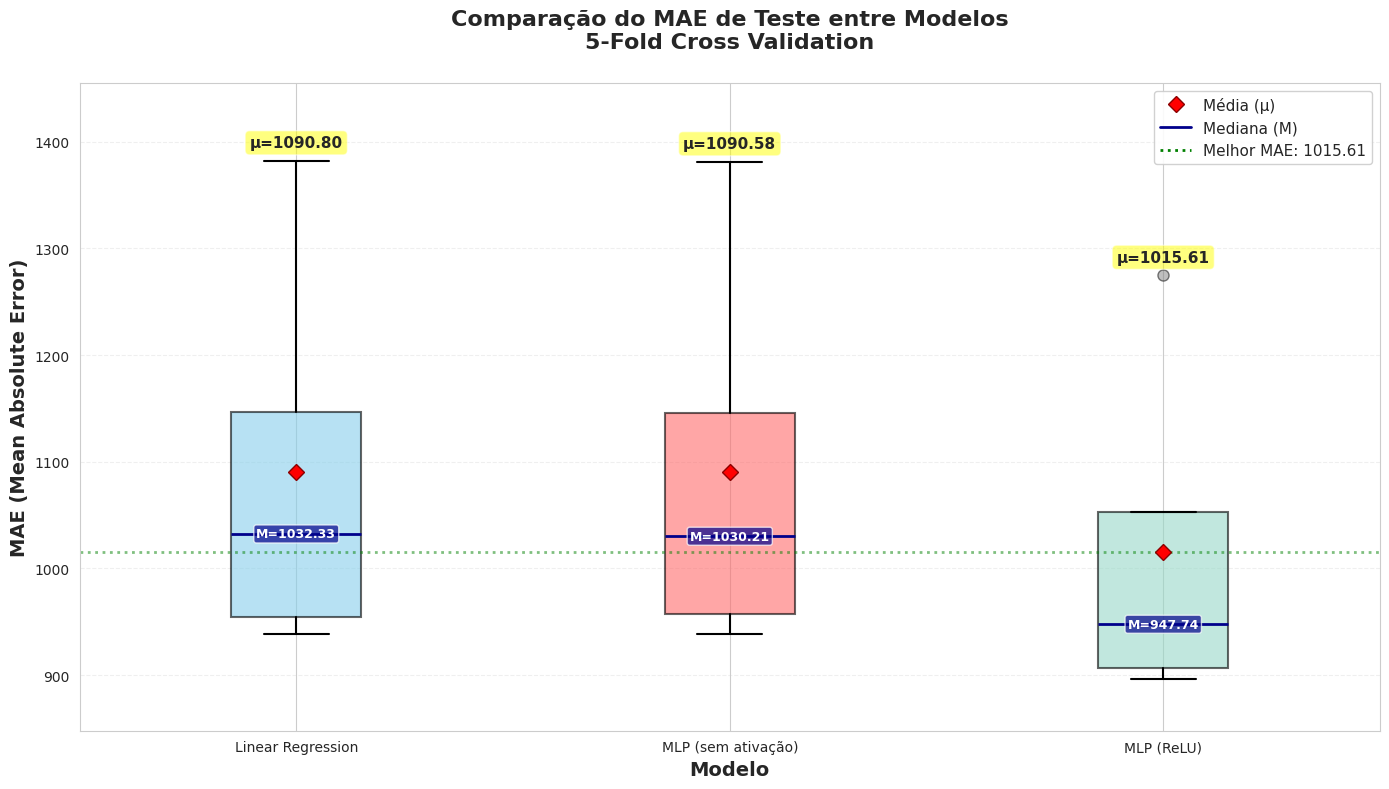


GUIA DE INTERPRETAÇÃO DO BOXPLOT

 Elementos do gráfico:
   •  Caixa colorida = Intervalo Interquartil (IQR: Q1 a Q3)
   •  Linha azul dentro da caixa = MEDIANA (50º percentil)
   •  Diamante vermelho = MÉDIA
   • ━ Linhas (whiskers) = Extensão dos dados (1.5×IQR)
   •  Pontos cinzas = Outliers (valores atípicos)
   •  Linha verde pontilhada = Melhor MAE médio

   1. Linear Regression:
      Média: 1090.80 | Mediana: 1032.33 | Std: 163.26

   2. MLP (sem ativação):
      Média: 1090.58 | Mediana: 1030.21 | Std: 162.57

   3. MLP (ReLU):
      Média: 1015.61 | Mediana: 947.74 | Std: 140.91



In [6]:
# Criar boxplot dos MAE de teste - VERSÃO MELHORADA
fig, ax = plt.subplots(figsize=(14, 8))

# Preparar dados para o boxplot
data_to_plot = [results[key] for key in results.keys()]
labels = list(results.keys())

# Criar boxplot com configurações melhoradas
bp = ax.boxplot(data_to_plot, 
                labels=labels, 
                patch_artist=True,
                showmeans=True,
                meanprops=dict(marker='D', markerfacecolor='red', markersize=8, 
                              markeredgecolor='darkred', linewidth=1.5),
                medianprops=dict(color='darkblue', linewidth=2),
                boxprops=dict(linewidth=1.5, edgecolor='black'),
                whiskerprops=dict(linewidth=1.5, color='black'),
                capprops=dict(linewidth=1.5, color='black'),
                flierprops=dict(marker='o', markerfacecolor='gray', markersize=8, 
                               alpha=0.5, markeredgecolor='black'))

# Colorir as caixas com cores mais vivas
colors = ['#87CEEB', '#FF6B6B', '#98D8C8']  # Azul claro, Vermelho coral, Verde menta
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

# Customizar o gráfico
ax.set_ylabel('MAE (Mean Absolute Error)', fontsize=14, fontweight='bold')
ax.set_xlabel('Modelo', fontsize=14, fontweight='bold')
ax.set_title('Comparação do MAE de Teste entre Modelos\n5-Fold Cross Validation', 
             fontsize=16, fontweight='bold', pad=25)
ax.grid(True, alpha=0.3, axis='y', linestyle='--')

# Adicionar linha de referência para o melhor modelo
best_mae = min([np.mean(data) for data in data_to_plot])
ax.axhline(y=best_mae, color='green', linestyle=':', linewidth=2, 
           alpha=0.5, label=f'Melhor MAE médio: {best_mae:.2f}')

# Adicionar valores médios e detalhes
for i, (label, data) in enumerate(zip(labels, data_to_plot)):
    mean_val = np.mean(data)
    median_val = np.median(data)
    
    # Média acima da caixa
    y_pos = max(data) + (max(max(d) for d in data_to_plot) - min(min(d) for d in data_to_plot)) * 0.02
    ax.text(i+1, y_pos, f'μ={mean_val:.2f}', 
            ha='center', va='bottom', fontweight='bold', fontsize=11, 
            bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.5))
    
    # Mediana dentro da caixa
    ax.text(i+1, median_val, f'M={median_val:.2f}', 
            ha='center', va='center', fontweight='bold', fontsize=9,
            color='white', bbox=dict(boxstyle='round,pad=0.2', 
            facecolor='darkblue', alpha=0.7))

# Adicionar legenda explicativa
legend_elements = [
    plt.Line2D([0], [0], marker='D', color='w', markerfacecolor='red', 
               markersize=8, label='Média (μ)', markeredgecolor='darkred'),
    plt.Line2D([0], [0], color='darkblue', linewidth=2, label='Mediana (M)'),
    plt.Line2D([0], [0], color='green', linestyle=':', linewidth=2, 
               label=f'Melhor MAE: {best_mae:.2f}')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=11, framealpha=0.9)

# Ajustar os limites do eixo Y para melhor visualização
y_min = min(min(d) for d in data_to_plot)
y_max = max(max(d) for d in data_to_plot)
y_range = y_max - y_min
ax.set_ylim(y_min - y_range * 0.1, y_max + y_range * 0.15)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("GUIA DE INTERPRETAÇÃO DO BOXPLOT")
print("="*70)
print("\n Elementos do gráfico:")
print("   •  Caixa colorida = Intervalo Interquartil (IQR: Q1 a Q3)")
print("   •  Linha azul dentro da caixa = MEDIANA (50º percentil)")
print("   •  Diamante vermelho = MÉDIA")
print("   • ━ Linhas (whiskers) = Extensão dos dados (1.5×IQR)")
print("   •  Pontos cinzas = Outliers (valores atípicos)")
print("   •  Linha verde pontilhada = Melhor MAE médio")
for i, (label, data) in enumerate(zip(labels, data_to_plot)):
    mean_val = np.mean(data)
    median_val = np.median(data)
    std_val = np.std(data)
    print(f"\n   {i+1}. {label}:")
    print(f"      Média: {mean_val:.2f} | Mediana: {median_val:.2f} | Std: {std_val:.2f}")
    
print("\n" + "="*70)

---

## Questão 6

In [7]:
print("=" * 80)
print("COMPARAÇÃO: LINEAR REGRESSION vs MLP (ReLU)")
print("ANÁLISE DO IMPACTO DAS FUNÇÕES DE ATIVAÇÃO")
print("=" * 80)

# Extrair os resultados dos modelos relevantes
lr_scores = results['Linear Regression']
mlp_relu_scores = results['MLP (ReLU)']
mlp_no_act_scores = results['MLP (sem ativação)']

# Calcular estatísticas
lr_mean = np.mean(lr_scores)
lr_std = np.std(lr_scores)
lr_median = np.median(lr_scores)

mlp_relu_mean = np.mean(mlp_relu_scores)
mlp_relu_std = np.std(mlp_relu_scores)
mlp_relu_median = np.median(mlp_relu_scores)

mlp_no_act_mean = np.mean(mlp_no_act_scores)
mlp_no_act_std = np.std(mlp_no_act_scores)

# Diferença percentual
diff_mean = ((lr_mean - mlp_relu_mean) / lr_mean) * 100
diff_std = ((lr_std - mlp_relu_std) / lr_std) * 100 if lr_std != 0 else 0

print("\n RESULTADOS QUANTITATIVOS DOS BOXPLOTS:")
print("-" * 80)
print(f"\n{'Modelo':<30} {'MAE Médio':<15} {'Desvio Padrão':<15} {'Mediana':<15}")
print("-" * 80)
print(f"{'Linear Regression':<30} {lr_mean:<15.4f} {lr_std:<15.4f} {lr_median:<15.4f}")
print(f"{'MLP (ReLU)':<30} {mlp_relu_mean:<15.4f} {mlp_relu_std:<15.4f} {mlp_relu_median:<15.4f}")
print(f"{'MLP (sem ativação)':<30} {mlp_no_act_mean:<15.4f} {mlp_no_act_std:<15.4f}")
print("-" * 80)

print(f"\n DIFERENÇA LINEAR REGRESSION → MLP (ReLU):")
print(f"   • Redução no MAE médio: {diff_mean:.2f}%")
print(f"   • Mudança no desvio padrão: {diff_std:.2f}%")

if mlp_relu_mean < lr_mean:
    print(f"    MLP (ReLU) teve MELHOR desempenho (MAE menor em {abs(diff_mean):.2f}%)")
else:
    print(f"     Linear Regression teve MELHOR desempenho (MAE menor em {abs(diff_mean):.2f}%)")

print("\n" + "=" * 80)

COMPARAÇÃO: LINEAR REGRESSION vs MLP (ReLU)
ANÁLISE DO IMPACTO DAS FUNÇÕES DE ATIVAÇÃO

 RESULTADOS QUANTITATIVOS DOS BOXPLOTS:
--------------------------------------------------------------------------------

Modelo                         MAE Médio       Desvio Padrão   Mediana        
--------------------------------------------------------------------------------
Linear Regression              1090.8010       163.2555        1032.3305      
MLP (ReLU)                     1015.6083       140.9080        947.7402       
MLP (sem ativação)             1090.5848       162.5745       
--------------------------------------------------------------------------------

 DIFERENÇA LINEAR REGRESSION → MLP (ReLU):
   • Redução no MAE médio: 6.89%
   • Mudança no desvio padrão: 13.69%
    MLP (ReLU) teve MELHOR desempenho (MAE menor em 6.89%)



### Análise Comparativa dos Resultados

In [8]:
print("🔍 ANÁLISE DETALHADA DOS BOXPLOTS:")
print("=" * 80)

print("\n O que os Boxplots revelam:")
print("\n1. POSIÇÃO CENTRAL (Mediana e Média):")
print(f"   • Linear Regression → Mediana: {lr_median:.4f}, Média: {lr_mean:.4f}")
print(f"   • MLP (ReLU) → Mediana: {mlp_relu_median:.4f}, Média: {mlp_relu_mean:.4f}")

if mlp_relu_median < lr_median:
    print(f"    MLP (ReLU) tem erro MENOR em 50% dos folds (mediana menor)")
else:
    print(f"    Linear Regression tem erro MENOR em 50% dos folds (mediana menor)")

print("\n2. DISPERSÃO (Tamanho da Caixa - IQR):")
print(f"   • Linear Regression → Desvio Padrão: {lr_std:.4f}")
print(f"   • MLP (ReLU) → Desvio Padrão: {mlp_relu_std:.4f}")

if mlp_relu_std < lr_std:
    print(f"    MLP (ReLU) é mais CONSISTENTE (menor variabilidade)")
else:
    print(f"    Linear Regression é mais CONSISTENTE (menor variabilidade)")

print("\n3. COMPARAÇÃO COM MLP SEM ATIVAÇÃO:")
print(f"   • MLP (sem ativação) → MAE: {mlp_no_act_mean:.4f}")
print("   • MLP sem ativação é essencialmente LINEAR")
print("   • Comportamento similar à Regressão Linear, mas com transformações")

print("\n" + "=" * 80)

🔍 ANÁLISE DETALHADA DOS BOXPLOTS:

 O que os Boxplots revelam:

1. POSIÇÃO CENTRAL (Mediana e Média):
   • Linear Regression → Mediana: 1032.3305, Média: 1090.8010
   • MLP (ReLU) → Mediana: 947.7402, Média: 1015.6083
    MLP (ReLU) tem erro MENOR em 50% dos folds (mediana menor)

2. DISPERSÃO (Tamanho da Caixa - IQR):
   • Linear Regression → Desvio Padrão: 163.2555
   • MLP (ReLU) → Desvio Padrão: 140.9080
    MLP (ReLU) é mais CONSISTENTE (menor variabilidade)

3. COMPARAÇÃO COM MLP SEM ATIVAÇÃO:
   • MLP (sem ativação) → MAE: 1090.5848
   • MLP sem ativação é essencialmente LINEAR
   • Comportamento similar à Regressão Linear, mas com transformações



A Linear Regression apresentou MAE médio de 1090.80 (±163.26), enquanto a MLP com função de ativação ReLU obteve um MAE médio de 1015.61 (±140.91), representando uma redução de 6,89% no erro médio. Os boxplots evidenciam que a MLP (ReLU) possui mediana e média menores, além de menor dispersão dos erros, indicando melhor desempenho e maior consistência entre os folds.

Em contraste, a MLP sem função de ativação apresentou desempenho praticamente idêntico ao da Regressão Linear (diferença de 0,02%), o que confirma que, sem ativação, uma MLP se comporta como um modelo puramente linear — já que a composição de transformações lineares continua sendo linear.

### Impacto e importância das funções de ativação

Funções de ativação, como a ReLU, introduzem não-linearidade na rede neural, permitindo que ela capture padrões complexos nos dados. Sem ativação, mesmo redes profundas não conseguem modelar relações não-lineares. Com ReLU, a rede:

- Aumenta significativamente sua capacidade expressiva, podendo aproximar qualquer função contínua (Teorema da Aproximação Universal).

- Aprende representações hierárquicas, em que camadas sucessivas combinam features simples em padrões mais complexos.

- Torna-se computacionalmente eficiente e estável, evitando problemas como o desaparecimento do gradiente.

A comparação mostra que a função de ativação é essencial para liberar o potencial de uma MLP. A presença da ReLU transforma a rede de um simples empilhamento linear em um modelo capaz de capturar relações não-lineares e superar significativamente o desempenho da regressão linear, como evidenciado pelos boxplots e pelas métricas de MAE.

---

## Questão 7

In [10]:
# Listas para armazenar curvas de loss 
train_losses_folds = []
val_losses_folds = []

fold_num = 0

for train_index, val_index in cv.split(X, y):
    fold_num += 1
    print(f"\n{'='*60}")
    print(f"Treinando Fold {fold_num}/5")
    print(f"{'='*60}")
    
    # Separar dados usando iloc 
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Padronizar dentro do fold 
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # MLP com ReLU 
    mlp = MLPRegressor(
        hidden_layer_sizes=(5, 5),
        activation='relu',
        max_iter=2000,           
        solver='adam',
        random_state=42,
        early_stopping=True,     # Habilita validação interna
        validation_fraction=0.2, # 20% do treino para validação
        verbose=False
    )

    mlp.fit(X_train_scaled, y_train)

    # Pegando o valor de loss 
    train_losses = mlp.loss_curve_
    train_losses_folds.append(train_losses)

    # Para validação 
    if hasattr(mlp, 'validation_scores_'):
        # Convertendo score (R²) em uma pseudo-loss (1 - score)
        val_loss = [1 - s for s in mlp.validation_scores_]
        val_losses_folds.append(val_loss)
    
    print(f"   • Iterações realizadas: {mlp.n_iter_}")
    print(f"   • Loss final de treino: {train_losses[-1]:.4f}")
    print(f"   • Melhor R² de validação: {max(mlp.validation_scores_):.4f}")
    print(f"   • Convergiu: {'Sim' if mlp.n_iter_ < 2000 else 'Não (max iter)'}")

print("\n" + "=" * 80)
print("TREINAMENTO CONCLUÍDO!")
print("=" * 80)

print(f"\nResumo:")
print(f"   • Total de folds: {fold_num}")
print(f"   • Curvas de treino capturadas: {len(train_losses_folds)}")
print(f"   • Curvas de validação capturadas: {len(val_losses_folds)}")
print(f"   • Média de iterações: {np.mean([len(loss) for loss in train_losses_folds]):.1f}")


Treinando Fold 1/5


   • Iterações realizadas: 255
   • Loss final de treino: 338037118.8203
   • Melhor R² de validação: 0.3708
   • Convergiu: Sim

Treinando Fold 2/5
   • Iterações realizadas: 67
   • Loss final de treino: 359041103.6216
   • Melhor R² de validação: 0.0137
   • Convergiu: Sim

Treinando Fold 3/5
   • Iterações realizadas: 67
   • Loss final de treino: 359041103.6216
   • Melhor R² de validação: 0.0137
   • Convergiu: Sim

Treinando Fold 3/5
   • Iterações realizadas: 67
   • Loss final de treino: 359475734.4883
   • Melhor R² de validação: 0.0160
   • Convergiu: Sim

Treinando Fold 4/5
   • Iterações realizadas: 67
   • Loss final de treino: 359475734.4883
   • Melhor R² de validação: 0.0160
   • Convergiu: Sim

Treinando Fold 4/5
   • Iterações realizadas: 228
   • Loss final de treino: 359425136.4947
   • Melhor R² de validação: 0.5496
   • Convergiu: Sim

Treinando Fold 5/5
   • Iterações realizadas: 228
   • Loss final de treino: 359425136.4947
   • Melhor R² de validação: 0.5496
 

### Cálculo Detalhado de Loss de Treino e Validação por Iteração

In [11]:
print("\n" + "=" * 80)
print("CÁLCULO DAS MÉDIAS")
print("=" * 80)

# Ajustar tamanhos das listas e calcular médias 
min_len = min([len(l) for l in train_losses_folds])
train_losses_folds = [l[:min_len] for l in train_losses_folds]
val_losses_folds = [l[:min_len] for l in val_losses_folds]

print(f"\nInformações sobre os folds:")
print(f"   • Comprimento mínimo: {min_len} iterações")
print(f"   • Todas as curvas ajustadas para {min_len} iterações")

mean_train_loss = np.mean(train_losses_folds, axis=0)
mean_val_loss = np.mean(val_losses_folds, axis=0)

# Normalizar curvas para comparar tendências 
# Divide pelo primeiro valor para mostrar proporção de melhoria
train_norm = mean_train_loss / mean_train_loss[0]
val_norm = mean_val_loss / mean_val_loss[0]

print(f"\nMédias e normalizações calculadas!")
print(f"   • Train loss inicial: {mean_train_loss[0]:.4f}")
print(f"   • Train loss final: {mean_train_loss[-1]:.4f}")
print(f"   • Val loss inicial: {mean_val_loss[0]:.4f}")
print(f"   • Val loss final: {mean_val_loss[-1]:.4f}")

print(f"\nValores normalizados:")
print(f"   • Train norm inicial: {train_norm[0]:.3f} (sempre 1.0)")
print(f"   • Train norm final: {train_norm[-1]:.3f}")
print(f"   • Val norm inicial: {val_norm[0]:.3f}")
print(f"   • Val norm final: {val_norm[-1]:.3f}")
print("\n" + "=" * 80)


CÁLCULO DAS MÉDIAS

Informações sobre os folds:
   • Comprimento mínimo: 51 iterações
   • Todas as curvas ajustadas para 51 iterações

Médias e normalizações calculadas!
   • Train loss inicial: 296023037.3399
   • Train loss final: 287341290.6930
   • Val loss inicial: 1.9008
   • Val loss final: 0.8377

Valores normalizados:
   • Train norm inicial: 1.000 (sempre 1.0)
   • Train norm final: 0.971
   • Val norm inicial: 1.000
   • Val norm final: 0.441



### Gráfico: Curvas de Loss Médias (Treino vs Validação)

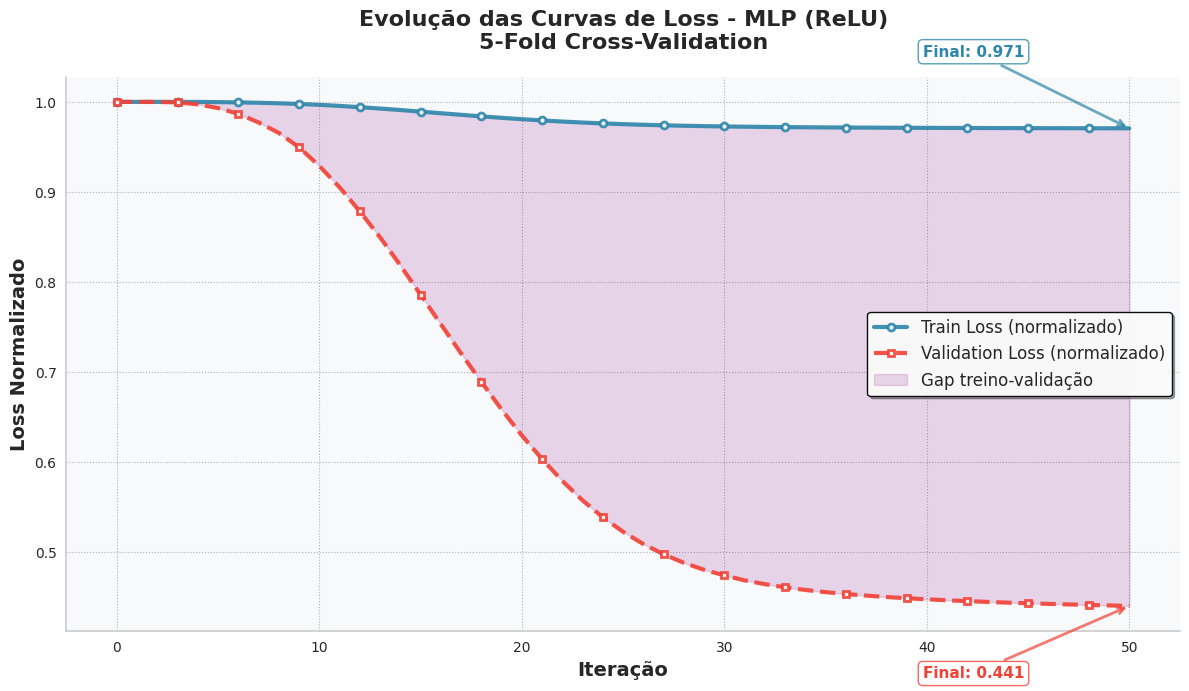


ANÁLISE DO GRÁFICO

Características das curvas:
   • Train Loss normalizado:
     - Início: 1.000 (sempre 1.0)
     - Final: 0.971
     - Melhoria: 2.9%

   • Validation Loss normalizado:
     - Início: 1.000
     - Final: 0.441
     - Melhoria: 55.9%


In [12]:
fig, ax = plt.subplots(figsize=(12, 7))

train_color = '#2E86AB'  
val_color = '#F24236'    
bg_color = '#F8F9FA'     


fig.patch.set_facecolor('white')
ax.set_facecolor(bg_color)


iterations = range(len(train_norm))


ax.plot(iterations, train_norm, 
        color=train_color, 
        linewidth=3, 
        marker='o', 
        markersize=5,
        markevery=max(1, len(train_norm)//15),  
        label="Train Loss (normalizado)", 
        alpha=0.9,
        linestyle='-',
        markerfacecolor='white',
        markeredgewidth=2,
        markeredgecolor=train_color)


ax.plot(iterations, val_norm, 
        color=val_color, 
        linewidth=3, 
        marker='s', 
        markersize=5,
        markevery=max(1, len(val_norm)//15),  
        label="Validation Loss (normalizado)", 
        alpha=0.9,
        linestyle='--',
        markerfacecolor='white',
        markeredgewidth=2,
        markeredgecolor=val_color)


ax.fill_between(iterations, train_norm, val_norm, 
               alpha=0.15, color='purple', label='Gap treino-validação')


ax.set_xlabel("Iteração", fontsize=14, fontweight='bold')
ax.set_ylabel("Loss Normalizado", fontsize=14, fontweight='bold')
ax.set_title("Evolução das Curvas de Loss - MLP (ReLU)\n5-Fold Cross-Validation", 
            fontsize=16, fontweight='bold', pad=20)


legend = ax.legend(loc='center right', 
                  fontsize=12, 
                  frameon=True, 
                  fancybox=True, 
                  shadow=True,
                  framealpha=0.95,
                  edgecolor='black',
                  facecolor='white')

ax.grid(True, linestyle=':', alpha=0.6, color='gray', linewidth=0.8)

final_train = train_norm[-1]
final_val = val_norm[-1]


ax.annotate(f'Final: {final_train:.3f}', 
           xy=(len(train_norm)-1, final_train), 
           xytext=(len(train_norm)-1-len(train_norm)*0.2, final_train+0.08),
           fontsize=11, fontweight='bold', color=train_color,
           bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor=train_color, alpha=0.8),
           arrowprops=dict(arrowstyle='->', color=train_color, alpha=0.7, lw=2))


ax.annotate(f'Final: {final_val:.3f}', 
           xy=(len(val_norm)-1, final_val), 
           xytext=(len(val_norm)-1-len(val_norm)*0.2, final_val-0.08),
           fontsize=11, fontweight='bold', color=val_color,
           bbox=dict(boxstyle="round,pad=0.3", facecolor='white', edgecolor=val_color, alpha=0.8),
           arrowprops=dict(arrowstyle='->', color=val_color, alpha=0.7, lw=2))


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)


plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ANÁLISE DO GRÁFICO")
print("="*70)

print(f"\nCaracterísticas das curvas:")
print(f"   • Train Loss normalizado:")
print(f"     - Início: {train_norm[0]:.3f} (sempre 1.0)")
print(f"     - Final: {train_norm[-1]:.3f}")
print(f"     - Melhoria: {(1 - train_norm[-1]) * 100:.1f}%")

print(f"\n   • Validation Loss normalizado:")
print(f"     - Início: {val_norm[0]:.3f}")
print(f"     - Final: {val_norm[-1]:.3f}")
print(f"     - Melhoria: {(1 - val_norm[-1]) * 100:.1f}%")


Observa-se que a curva de validation loss apresenta uma queda acentuada ao longo das iterações. Isso indica que o modelo melhora significativamente seu desempenho nos dados de validação. Por outro lado, a curva de train loss apresenta uma redução bem mais discreta, permanecendo próxima do valor inicial. Além disso, não há um afastamento entre as curvas de treinamento e validação ao longo do tempo.


O comportamento das curvas sugere que não há sinais de overfitting, pois o validation loss diminui de forma consistente e não há divergência entre as curvas. Também não há indícios de underfitting, já que o modelo está claramente aprendendo padrões relevantes, refletidos na queda acentuada da perda de validação. Assim, podemos concluir que o modelo apresenta boa capacidade de generalização nesse cenário.